In [1]:
import warnings
warnings.filterwarnings("ignore")
import json
import argparse
from utils import init_dl_program,dict2class
from infots import InfoTS as MetaInfoTS
import datautils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = 'electricity.uni'

In [3]:
# initialization
with open(f'./configures/{dataset}.json') as f:
    configs = json.load(f)
parser = argparse.ArgumentParser()
args = dict2class(**configs)
device = init_dl_program(args.gpu, seed=args.seed, max_threads=args.max_threads)


In [4]:
#prepare datasets
valid_dataset = datautils.load_forecast_csv(args.dataset, univar=True)
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols= valid_dataset
train_data = data[:, train_slice]

#preprocess
if train_data.shape[0] == 1:
    train_slice_number = int(train_data.shape[1] / args.max_train_length)
    if train_slice_number < args.batch_size:
        args.batch_size = train_slice_number
else:
    if train_data.shape[0] < args.batch_size:
        args.batch_size = train_data.shape[0]

In [5]:
model = MetaInfoTS(
    batch_size=args.batch_size,
    lr=args.lr,
    meta_lr = args.meta_lr,
    output_dims=args.repr_dims,
    max_train_length=args.max_train_length,
    input_dims=train_data.shape[-1],
    device=device,
    num_cls =  args.batch_size,
    aug_p1= args.aug_p1,
    eval_every_epoch =20
)

In [6]:
res = model.fit(train_data,
     task_type = 'forecasting',
     meta_beta=args.meta_beta,
     n_epochs=args.epochs,
     n_iters=args.iters,
     beta = args.beta,
     verbose=False,
     miverbose=True,
     split_number=args.split_number,
     supervised_meta = False, # for forecasting, use unsupervised setting.
     valid_dataset = valid_dataset,
     train_labels= None
    )

{24: {'norm': {'MSE': 0.2617035741779523, 'MAE': 0.2827750840946487}}}
{24: {'norm': {'MSE': 0.25555403249750425, 'MAE': 0.28207835478559695}}}
{24: {'norm': {'MSE': 0.25305611557088503, 'MAE': 0.2788975711229501}}}
{24: {'norm': {'MSE': 0.2510221634294601, 'MAE': 0.2783738773610827}}}
{24: {'norm': {'MSE': 0.2495445035724315, 'MAE': 0.27674478465524033}}}
{24: {'norm': {'MSE': 0.24886598008380678, 'MAE': 0.2756426609520284}}}
{24: {'norm': {'MSE': 0.24876572835797672, 'MAE': 0.2765298394681216}}}
{24: {'norm': {'MSE': 0.24844540152186004, 'MAE': 0.27586769437930175}}}
{24: {'norm': {'MSE': 0.24826084183136607, 'MAE': 0.2751756799889807}}}
{24: {'norm': {'MSE': 0.24813608131457854, 'MAE': 0.2744406462514986}}}
{24: {'norm': {'MSE': 0.24819224614026508, 'MAE': 0.27394853203627284}}}
{24: {'norm': {'MSE': 0.24827628864825121, 'MAE': 0.2736421273004473}}}
{24: {'norm': {'MSE': 0.24831988482442796, 'MAE': 0.27342125963554215}}}
{24: {'norm': {'MSE': 0.2483212061066171, 'MAE': 0.27321416188

In [11]:
mse = mse[:-1]
mae = mae[:-1]

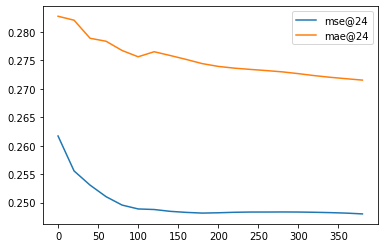

In [12]:
x = 20*np.arange(len(mse))
plt.plot(x, mse, label = "mse@24")
plt.plot(x, mae, label = "mae@24")
plt.legend()
plt.show()